In [1]:
import sys
import pandas as pd
import time
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay,precision_recall_curve
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

##Importando Base de Dados (creditcard.csv)

In [2]:
import urllib.request
from os.path import exists

if(not exists("/content/creditcard.csv")):
  urllib.request.urlretrieve("https://www.inf.ufpr.br/dac17/creditcard.csv", "creditcard.csv")

df = pd.read_csv('/content/creditcard.csv')
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

[0.0, 6911.68, 13823.36, 20735.04, 27646.72, 34558.4, 41470.08, 48381.76, 55293.44, 62205.12, 69116.8, 76028.48000000001, 82940.16, 89851.84, 96763.52, 103675.20000000001, 110586.88, 117498.56, 124410.24, 131321.92, 138233.6, 145145.28, 152056.96000000002, 158968.64, 165880.32, 172792.0]


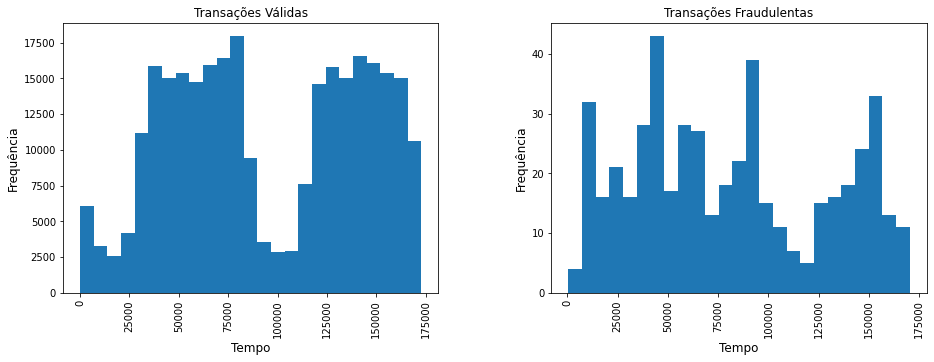

In [3]:
# Definindo conjuntos e valor in intervalos inicio e fim de conjuntos.
bins = 25;
interval = df['Time'].iloc[-1]/bins
ranges = [x*interval for x in range(bins+1)]


%matplotlib inline
print(ranges)
plt.rcParams['figure.figsize'] = [15, 5]
font={"size": 12}

histogramas = df.hist(column='Time', bins=bins, by="Class")
# plt.xticks(ranges)
# plt.suptitle("Histograma em Trasações com relação Classe e Tempo")

histogramas.flatten()[0].set_title("Transações Válidas", fontdict=font)
histogramas.flatten()[1].set_title("Transações Fraudulentas", fontdict=font)
for ax in histogramas.flatten():
    ax.set_xlabel("Tempo", fontdict=font)
    ax.set_ylabel("Frequência", fontdict=font)
plt.show()
plt.close()

[0.0, 1712.744, 3425.488, 5138.232, 6850.976, 8563.72, 10276.464, 11989.207999999999, 13701.952, 15414.696, 17127.44, 18840.183999999997, 20552.928, 22265.672, 23978.415999999997, 25691.16]


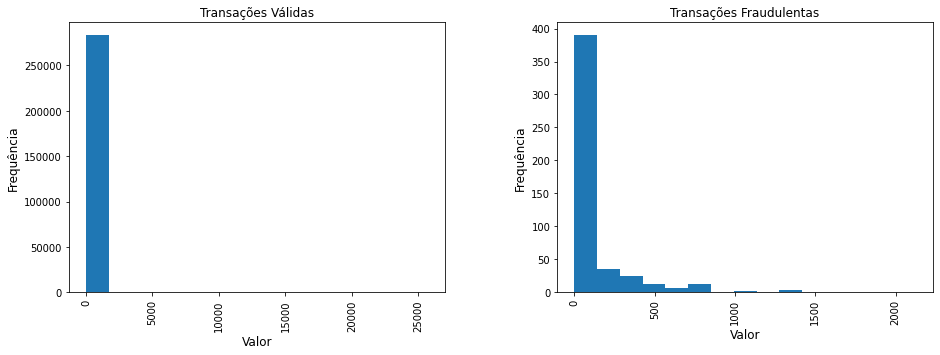

In [4]:
# Definindo conjuntos e valor in intervalos inicio e fim de conjuntos.
bins = 15;
interval = df.Amount.max()/bins
ranges = [x*interval for x in range(bins+1)]


%matplotlib inline
print(ranges)
plt.rcParams['figure.figsize'] = [15, 5]
font={"size": 12}

histogramas = df.hist(column="Amount", bins=bins, by="Class")
# plt.suptitle("Histograma em Trasações com relação Classe e Valor")

histogramas.flatten()[0].set_title("Transações Válidas", fontdict=font)
histogramas.flatten()[1].set_title("Transações Fraudulentas", fontdict=font)
for ax in histogramas.flatten():
    ax.set_xlabel("Valor", fontdict=font)
    ax.set_ylabel("Frequência", fontdict=font)
    ax.set_xticklabels
plt.show()
plt.close()

###Dividindo Treino / Teste

In [ ]:
X = df.loc[:, df.columns != 'Class']
y = df['Class']

print(X.head)
print(y.head)

<bound method NDFrame.head of             Time         V1         V2  ...       V27       V28  Amount
0            0.0  -1.359807  -0.072781  ...  0.133558 -0.021053  149.62
1            0.0   1.191857   0.266151  ... -0.008983  0.014724    2.69
2            1.0  -1.358354  -1.340163  ... -0.055353 -0.059752  378.66
3            1.0  -0.966272  -0.185226  ...  0.062723  0.061458  123.50
4            2.0  -1.158233   0.877737  ...  0.219422  0.215153   69.99
...          ...        ...        ...  ...       ...       ...     ...
284802  172786.0 -11.881118  10.071785  ...  0.943651  0.823731    0.77
284803  172787.0  -0.732789  -0.055080  ...  0.068472 -0.053527   24.79
284804  172788.0   1.919565  -0.301254  ...  0.004455 -0.026561   67.88
284805  172788.0  -0.240440   0.530483  ...  0.108821  0.104533   10.00
284806  172792.0  -0.533413  -0.189733  ... -0.002415  0.013649  217.00

[284807 rows x 30 columns]>
<bound method NDFrame.head of 0         0
1         0
2         0
3         0

##Análise

###Definindo função genérica para análise

In [ ]:
def analisis(X_train, y_train, X_test,  y_test, method, name):

  #Set the chosen model
  model = method

  print (f'Fitting {name}')
  model.fit(X_train, y_train)

  # predicao do classificador
  print ('Predicting...')
  y_pred = model.predict(X_test)

  # mostra o resultado do classificador na base de teste
  print ('Accuracy: ',  model.score(X_test, y_test))

  # cria a matriz de confusao
  cm = confusion_matrix(y_test, y_pred)
  print (cm)
  print(classification_report(y_test, y_pred, labels=[0,1]))

  # Imprime Curva ROC
  y_pred_proba = model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
  display.plot()
  plt.title(f"Curva ROC {name}")
  plt.show()

  # Imprime Gráfico PrecisionRecallDisplay
  display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name)
  _ = display.ax_.set_title(f"Precision-Recall {name}")
  plt.show()


###Definindo Análises para cada modelo.

###KNN

****************** KF 0 ******************
TRAIN:
0    227468
1       377
Name: Class, dtype: int64
TEST:
0    56847
1      115
Name: Class, dtype: int64
Fitting KNN
Predicting...
Accuracy:  0.9980688880306169
[[56847     0]
 [  110     5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       1.00      0.04      0.08       115

    accuracy                           1.00     56962
   macro avg       1.00      0.52      0.54     56962
weighted avg       1.00      1.00      1.00     56962



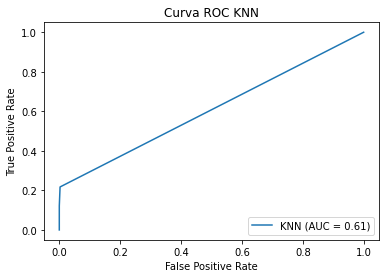

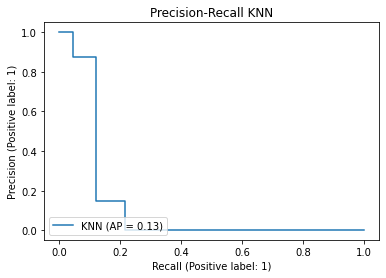

 tempo : 1145.228973865509
**********************************************


****************** KF 1 ******************
TRAIN:
0    227445
1       400
Name: Class, dtype: int64
TEST:
0    56870
1       92
Name: Class, dtype: int64
Fitting KNN
Predicting...
Accuracy:  0.9985253326779256
[[56870     0]
 [   84     8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       1.00      0.09      0.16        92

    accuracy                           1.00     56962
   macro avg       1.00      0.54      0.58     56962
weighted avg       1.00      1.00      1.00     56962



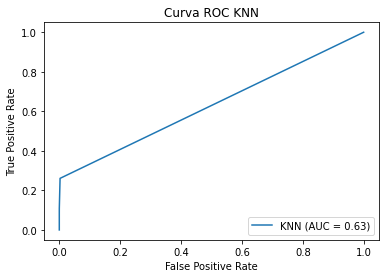

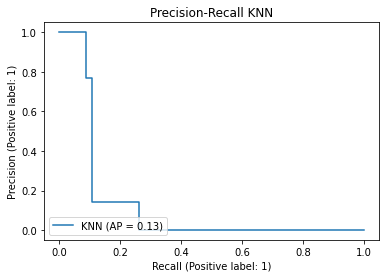

 tempo : 1148.5263001918793
**********************************************


****************** KF 2 ******************
TRAIN:
0    227457
1       389
Name: Class, dtype: int64
TEST:
0    56858
1      103
Name: Class, dtype: int64
Fitting KNN
Predicting...
Accuracy:  0.9983321922016819
[[56858     0]
 [   95     8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       1.00      0.08      0.14       103

    accuracy                           1.00     56961
   macro avg       1.00      0.54      0.57     56961
weighted avg       1.00      1.00      1.00     56961



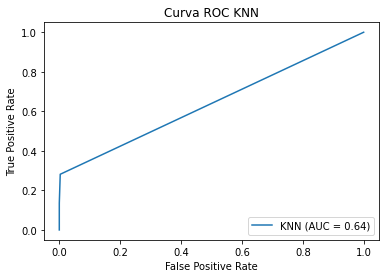

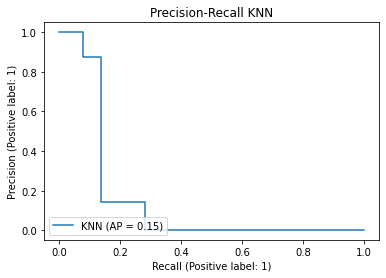

 tempo : 1165.136719942093
**********************************************


****************** KF 3 ******************
TRAIN:
0    227453
1       393
Name: Class, dtype: int64
TEST:
0    56862
1       99
Name: Class, dtype: int64
Fitting KNN
Predicting...
Accuracy:  0.9983146363301206
[[56862     0]
 [   96     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       1.00      0.03      0.06        99

    accuracy                           1.00     56961
   macro avg       1.00      0.52      0.53     56961
weighted avg       1.00      1.00      1.00     56961



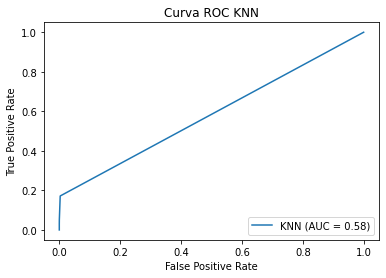

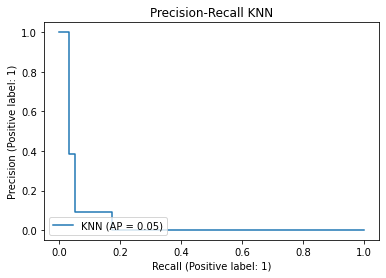

 tempo : 1214.488806962967
**********************************************


****************** KF 4 ******************
TRAIN:
0    227437
1       409
Name: Class, dtype: int64
TEST:
0    56878
1       83
Name: Class, dtype: int64
Fitting KNN
Predicting...
Accuracy:  0.9986130861466618
[[56877     1]
 [   78     5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.83      0.06      0.11        83

    accuracy                           1.00     56961
   macro avg       0.92      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961



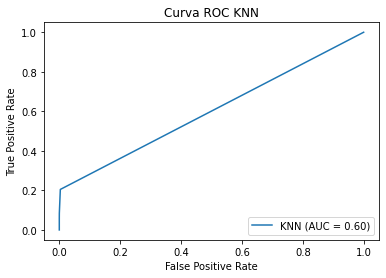

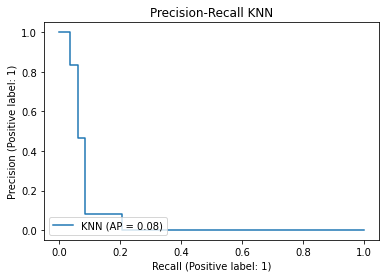

 tempo : 1181.889803647995
**********************************************




In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=123)

for idx, [train_index, test_index] in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  print(f"****************** KF {idx} ******************")
  print("TRAIN:")
  print(y_train.value_counts())
  print("TEST:")
  print(y_test.value_counts())

  start_time = time.time()
  analisis(X_train, y_train, X_test, y_test, KNeighborsClassifier(), 'KNN')
  print(f" tempo : {(time.time() - start_time)}")
  print("**********************************************\n\n")

  




### MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier 

In [ ]:
# clf = MLPClassifier(random_state=123, max_iter=300).fit(X_train, Y_train)
# a = clf.predict_proba(X_test)
# b = clf.predict(X_test)
# clf.score(X_test, Y_test)
# cm_mlp_b = confusion_matrix(Y_test, b)
# print (cm)
# print(classification_report(Y_test, b, labels=[0,1,2]))

****************** KF 0 ******************
TRAIN:
0    227468
1       377
Name: Class, dtype: int64
TEST:
0    56847
1      115
Name: Class, dtype: int64
Fitting MLP
Predicting...
Accuracy:  0.9982971103542713
[[56769    78]
 [   19    96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.55      0.83      0.66       115

    accuracy                           1.00     56962
   macro avg       0.78      0.92      0.83     56962
weighted avg       1.00      1.00      1.00     56962



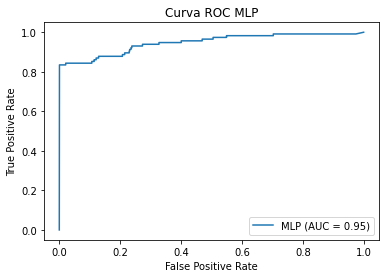

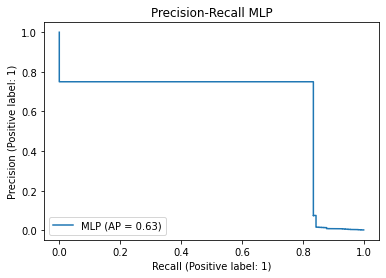

 tempo : 124.92344069480896
**********************************************


****************** KF 1 ******************
TRAIN:
0    227445
1       400
Name: Class, dtype: int64
TEST:
0    56870
1       92
Name: Class, dtype: int64
Fitting MLP
Predicting...
Accuracy:  0.9983322214809873
[[56799    71]
 [   24    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.49      0.74      0.59        92

    accuracy                           1.00     56962
   macro avg       0.74      0.87      0.79     56962
weighted avg       1.00      1.00      1.00     56962



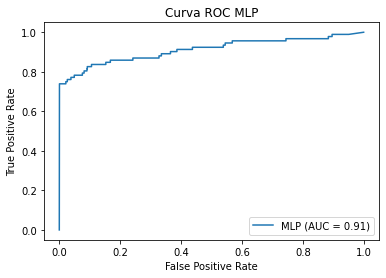

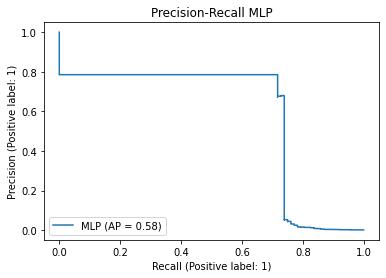

 tempo : 131.61167073249817
**********************************************


****************** KF 2 ******************
TRAIN:
0    227457
1       389
Name: Class, dtype: int64
TEST:
0    56858
1      103
Name: Class, dtype: int64
Fitting MLP
Predicting...
Accuracy:  0.9983673039448043
[[56843    15]
 [   78    25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.62      0.24      0.35       103

    accuracy                           1.00     56961
   macro avg       0.81      0.62      0.67     56961
weighted avg       1.00      1.00      1.00     56961



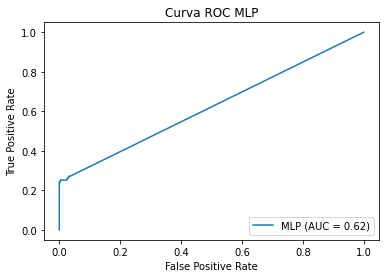

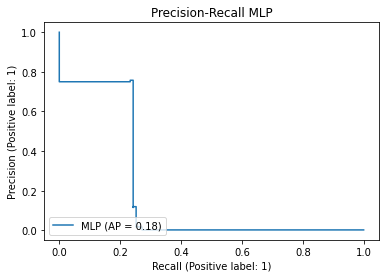

 tempo : 126.6863317489624
**********************************************


****************** KF 3 ******************
TRAIN:
0    227453
1       393
Name: Class, dtype: int64
TEST:
0    56862
1       99
Name: Class, dtype: int64
Fitting MLP
Predicting...
Accuracy:  0.9980161865135795
[[56774    88]
 [   25    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.46      0.75      0.57        99

    accuracy                           1.00     56961
   macro avg       0.73      0.87      0.78     56961
weighted avg       1.00      1.00      1.00     56961



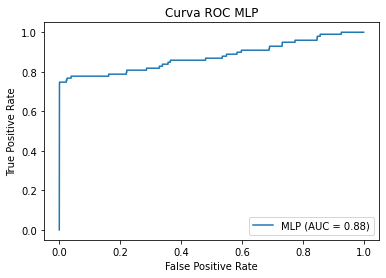

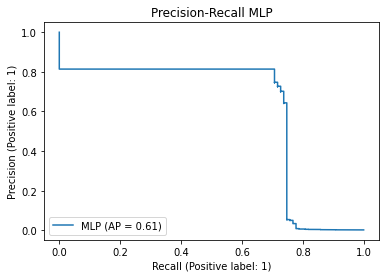

 tempo : 70.97000980377197
**********************************************


****************** KF 4 ******************
TRAIN:
0    227437
1       409
Name: Class, dtype: int64
TEST:
0    56878
1       83
Name: Class, dtype: int64
Fitting MLP
Predicting...
Accuracy:  0.9982093011007531
[[56792    86]
 [   16    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.44      0.81      0.57        83

    accuracy                           1.00     56961
   macro avg       0.72      0.90      0.78     56961
weighted avg       1.00      1.00      1.00     56961



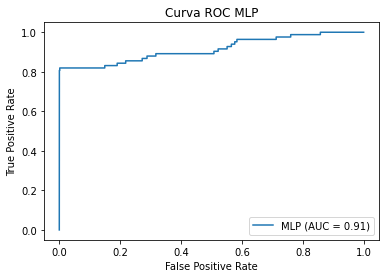

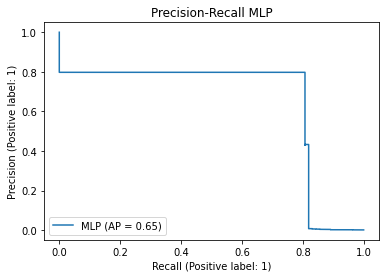

 tempo : 118.23879551887512
**********************************************




In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

for idx, [train_index, test_index] in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  print(f"****************** KF {idx} ******************")
  print("TRAIN:")
  print(y_train.value_counts())
  print("TEST:")
  print(y_test.value_counts())

  start_time = time.time()
  analisis(X_train, y_train, X_test, y_test, MLPClassifier(random_state=123, max_iter=300), 'MLP')
  print(f" tempo : {(time.time() - start_time)}")
  print("**********************************************\n\n")

##Catboost vs Catboost tunned

In [ ]:
!pip install catboost

In [ ]:
def analisis_catboost_tuned(X_train, y_train, X_test,  y_test, method, name):

  #Set the chosen model
  # model_ori = method.copy()
  # model_tuning = method.copy()
  
  model_ori = CatBoostClassifier(logging_level='Silent')
  model_tuning = CatBoostClassifier(learning_rate = 0.0947, max_depth = 7, n_estimators = 700, logging_level='Silent')

  # **************** TREINO ORIGINAL ****************
  print("------------------- TREINO ORIGINAL -------------------")

  print (f'Fitting Original {name}')
  model_ori.fit(X_train, y_train)

  # predicao do classificador
  print ('\tPredicting...')
  y_pred_ori = model_ori.predict(X_test)

  # mostra o resultado do classificador na base de teste
  print ('\tAccuracy: ',  model_ori.score(X_test, y_test))

  # cria a matriz de confusao
  cm = confusion_matrix(y_test, y_pred_ori)
  print (cm)
  print(classification_report(y_test, y_pred_ori, labels=[0,1]))

  print("------------------- TREINO TUNING -------------------")

  # Aplicando Tuning
  print (f'Fitting Tuning {name}')

  model_tuning.fit(X_train, y_train)


  # predicao do classificador
  print ('\tPredicting...')
  y_pred_tuning = model_tuning.predict(X_test)

  # mostra o resultado do classificador na base de teste
  print ('\tAccuracy: ',  model_tuning.score(X_test, y_test))

  # cria a matriz de confusao
  cm = confusion_matrix(y_test, y_pred_tuning)
  print (cm)
  print(classification_report(y_test, y_pred_tuning, labels=[0,1]))

  #  Imprimindo Gréficos
  #  Curva ROC
  y_pred_proba_ori = model_ori.predict_proba(X_test)[:,1]
  y_pred_proba_tuning = model_tuning.predict_proba(X_test)[:,1]

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ori)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label=f"{name} Original: {roc_auc:.3f}")

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tuning)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label=f"{name} Tuning: {roc_auc:.3f}")

  leg = plt.legend(loc='lower right')

  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

  plt.title(f"Curvas ROC {name}")
  plt.show()
  
  # Curva Precision-Recall
  precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_ori)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision,label=f"{name} Original: {pr_auc:.3f}")
  
  precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_tuning)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f"{name} Tuned: {pr_auc:.3f}")

  leg = plt.legend(loc='lower left')

  plt.xlabel("Recall")
  plt.ylabel("Precision")

  plt.title(f"Precision-Recall {name}")
  plt.show()

****************** KF 0 ******************
TRAIN:
0    227468
1       377
Name: Class, dtype: int64
TEST:
0    56847
1      115
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9994908886626171
[[56841     6]
 [   23    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.94      0.80      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------- TREINO TUNING -------------------
Fitting Tuning CatBoostClassifier
	Predicting...
	Accuracy:  0.9995435553526912
[[56842     5]
 [   21    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.95      0.82      0.88       115

    accuracy         

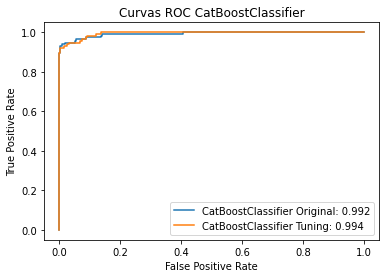

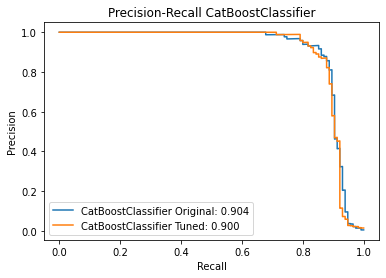

 tempo : 105.69813561439514
**********************************************


****************** KF 1 ******************
TRAIN:
0    227445
1       400
Name: Class, dtype: int64
TEST:
0    56870
1       92
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9995786664794073
[[56867     3]
 [   21    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.96      0.77      0.86        92

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------- TREINO TUNING -------------------
Fitting Tuning CatBoostClassifier
	Predicting...
	Accuracy:  0.9995786664794073
[[56867     3]
 [   21    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870

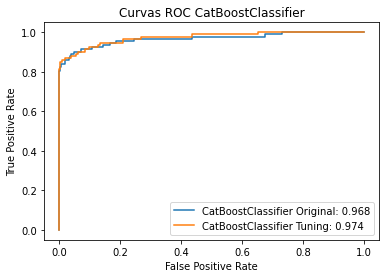

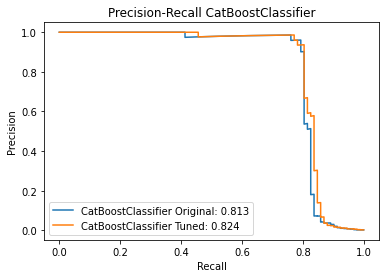

 tempo : 106.663170337677
**********************************************


****************** KF 2 ******************
TRAIN:
0    227457
1       389
Name: Class, dtype: int64
TEST:
0    56858
1      103
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9996137708256526
[[56857     1]
 [   21    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.99      0.80      0.88       103

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO TUNING -------------------
Fitting Tuning CatBoostClassifier
	Predicting...
	Accuracy:  0.9996313266972139
[[56857     1]
 [   20    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
 

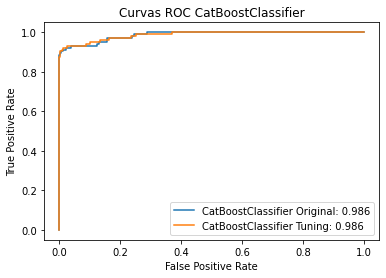

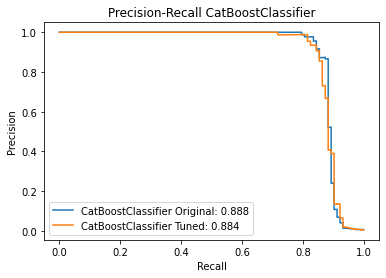

 tempo : 106.56833004951477
**********************************************


****************** KF 3 ******************
TRAIN:
0    227453
1       393
Name: Class, dtype: int64
TEST:
0    56862
1       99
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9995435473394076
[[56857     5]
 [   21    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.79      0.86        99

    accuracy                           1.00     56961
   macro avg       0.97      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO TUNING -------------------
Fitting Tuning CatBoostClassifier
	Predicting...
	Accuracy:  0.9995611032109689
[[56857     5]
 [   20    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862

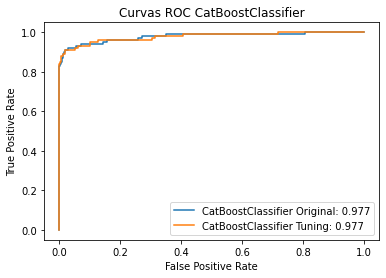

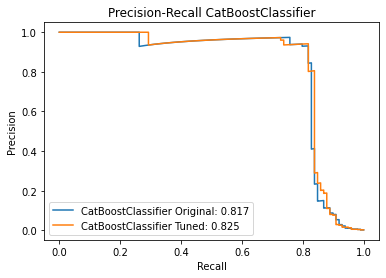

 tempo : 105.52670121192932
**********************************************


****************** KF 4 ******************
TRAIN:
0    227437
1       409
Name: Class, dtype: int64
TEST:
0    56878
1       83
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9996488825687752
[[56873     5]
 [   15    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.93      0.82      0.87        83

    accuracy                           1.00     56961
   macro avg       0.97      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO TUNING -------------------
Fitting Tuning CatBoostClassifier
	Predicting...
	Accuracy:  0.9996488825687752
[[56874     4]
 [   16    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878

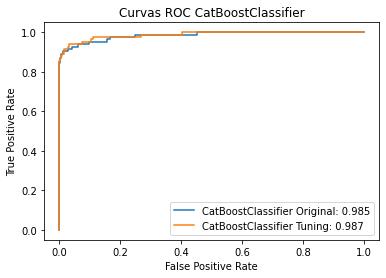

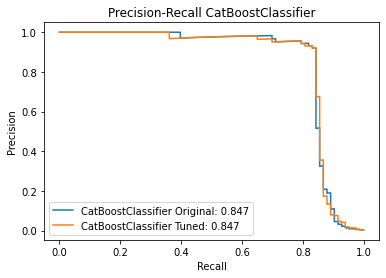

 tempo : 105.66181015968323
**********************************************




In [ ]:
# CatBoostClassifier
from catboost import CatBoostClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=123)

for idx, [train_index, test_index] in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  print(f"****************** KF {idx} ******************")
  print("TRAIN:")
  print(y_train.value_counts())
  print("TEST:")
  print(y_test.value_counts())

  start_time = time.time()
  analisis_catboost_tuned(X_train, y_train, X_test, y_test, 'tunnedvsuntunned', 'CatBoostClassifier')
  print(f" tempo : {(time.time() - start_time)}")
  print("**********************************************\n\n")

##Catboost tunned vs Catboost tunned + SMOTE

In [ ]:
!pip install catboost

In [ ]:
def analisis_smote(X_train, y_train, X_test,  y_test, method, name):

  #Set the chosen model
  model_ori = method.copy()
  model_smote = method.copy()
  
  # **************** TREINO ORIGINAL ****************
  print("------------------- TREINO ORIGINAL -------------------")

  print (f'Fitting Original {name}')
  model_ori.fit(X_train, y_train)

  # predicao do classificador
  print ('\tPredicting...')
  y_pred_ori = model_ori.predict(X_test)

  # mostra o resultado do classificador na base de teste
  print ('\tAccuracy: ',  model_ori.score(X_test, y_test))

  # cria a matriz de confusao
  cm = confusion_matrix(y_test, y_pred_ori)
  print (cm)
  print(classification_report(y_test, y_pred_ori, labels=[0,1]))

  print("------------------- TREINO SMOTE -------------------")

  # Aplicando SMOTE
  sm = SMOTE(random_state=42)
  X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

  print (f'Fitting SMOTE {name}')
  model_smote.fit(X_train_smote, y_train_smote)


  # predicao do classificador
  print ('\tPredicting...')
  y_pred_smote = model_smote.predict(X_test)

  # mostra o resultado do classificador na base de teste
  print ('\tAccuracy: ',  model_smote.score(X_test, y_test))

  # cria a matriz de confusao
  cm = confusion_matrix(y_test, y_pred_smote)
  print (cm)
  print(classification_report(y_test, y_pred_smote, labels=[0,1]))

  #  Imprimindo Gréficos
  #  Curva ROC
  y_pred_proba_ori = model_ori.predict_proba(X_test)[:,1]
  y_pred_proba_smote = model_smote.predict_proba(X_test)[:,1]

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ori)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label=f"{name} Original: {roc_auc:.3f}")

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba_smote)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr,label=f"{name} SMOTE: {roc_auc:.3f}")

  leg = plt.legend(loc='lower right')

  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

  plt.title(f"Curvas ROC {name}")
  plt.show()
  
  # Curva Precision-Recall
  precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_ori)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision,label=f"{name} Original: {pr_auc:.3f}")
  
  precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_smote)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f"{name} SMOTE: {pr_auc:.3f}")

  leg = plt.legend(loc='lower left')

  plt.xlabel("Recall")
  plt.ylabel("Precision")

  plt.title(f"Precision-Recall {name}")
  plt.show()

  # Retornando vetor de importancia de variáveis
  return model_smote.get_feature_importance()

****************** KF 0 ******************
TRAIN:
0    227468
1       377
Name: Class, dtype: int64
TEST:
0    56847
1      115
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9995435553526912
[[56842     5]
 [   21    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.95      0.82      0.88       115

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

------------------- TREINO SMOTE -------------------
Fitting SMOTE CatBoostClassifier
	Predicting...
	Accuracy:  0.9990871107053826
[[56809    38]
 [   14   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.73      0.88      0.80       115

    accuracy           

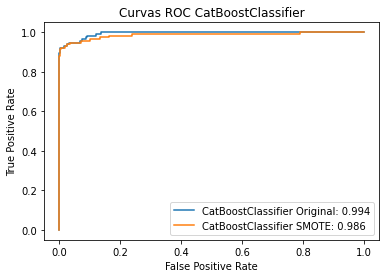

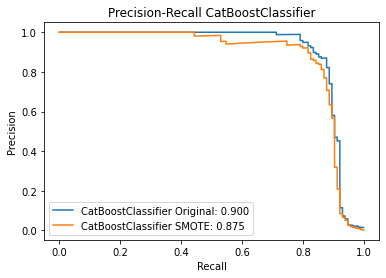

 tempo : 137.4361538887024
**********************************************


****************** KF 1 ******************
TRAIN:
0    227445
1       400
Name: Class, dtype: int64
TEST:
0    56870
1       92
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9995786664794073
[[56867     3]
 [   21    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.96      0.77      0.86        92

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------- TREINO SMOTE -------------------
Fitting SMOTE CatBoostClassifier
	Predicting...
	Accuracy:  0.9992802219023208
[[56847    23]
 [   18    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
  

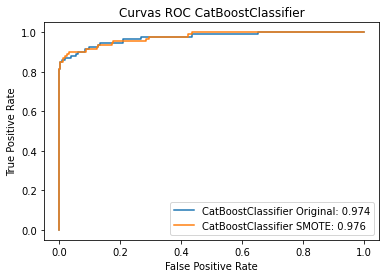

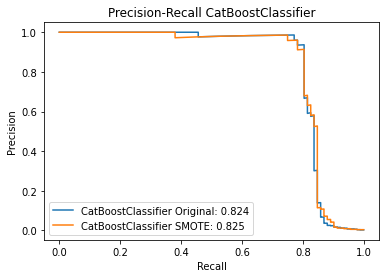

 tempo : 133.6656527519226
**********************************************


****************** KF 2 ******************
TRAIN:
0    227457
1       389
Name: Class, dtype: int64
TEST:
0    56858
1      103
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9996313266972139
[[56857     1]
 [   20    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.99      0.81      0.89       103

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO SMOTE -------------------
Fitting SMOTE CatBoostClassifier
	Predicting...
	Accuracy:  0.999280209265989
[[56829    29]
 [   12    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
   

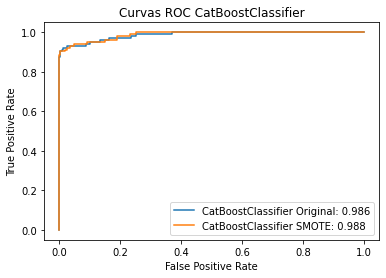

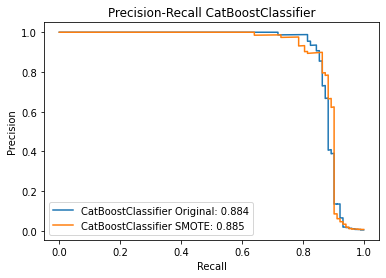

 tempo : 127.04401230812073
**********************************************


****************** KF 3 ******************
TRAIN:
0    227453
1       393
Name: Class, dtype: int64
TEST:
0    56862
1       99
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9995611032109689
[[56857     5]
 [   20    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.80      0.86        99

    accuracy                           1.00     56961
   macro avg       0.97      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO SMOTE -------------------
Fitting SMOTE CatBoostClassifier
	Predicting...
	Accuracy:  0.9990168711925703
[[56822    40]
 [   16    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
 

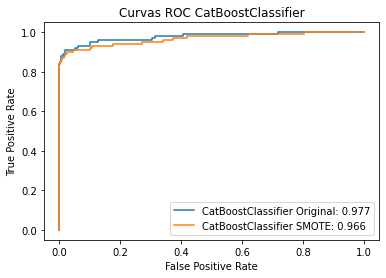

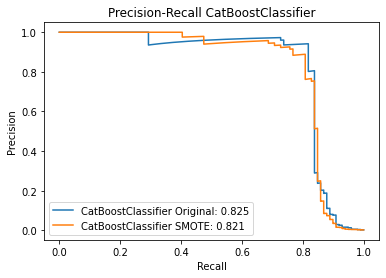

 tempo : 136.67205023765564
**********************************************


****************** KF 4 ******************
TRAIN:
0    227437
1       409
Name: Class, dtype: int64
TEST:
0    56878
1       83
Name: Class, dtype: int64
------------------- TREINO ORIGINAL -------------------
Fitting Original CatBoostClassifier
	Predicting...
	Accuracy:  0.9996488825687752
[[56874     4]
 [   16    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.94      0.81      0.87        83

    accuracy                           1.00     56961
   macro avg       0.97      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

------------------- TREINO SMOTE -------------------
Fitting SMOTE CatBoostClassifier
	Predicting...
	Accuracy:  0.9990870946788153
[[56838    40]
 [   12    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
 

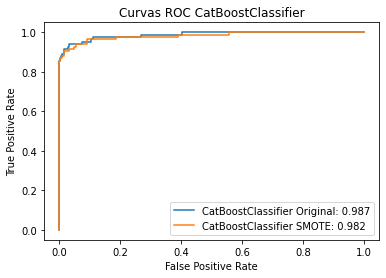

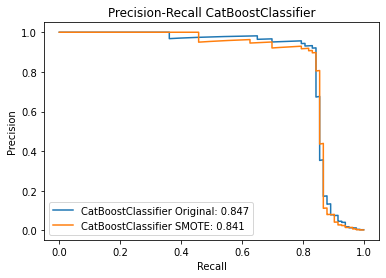

 tempo : 134.97364020347595
**********************************************




In [ ]:
# CatBoostClassifier
from catboost import CatBoostClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=123)

vet_importancia_var_smote = []

for idx, [train_index, test_index] in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  print(f"****************** KF {idx} ******************")
  print("TRAIN:")
  print(y_train.value_counts())
  print("TEST:")
  print(y_test.value_counts())

  start_time = time.time()
  imp_vet = analisis_smote(X_train, y_train, X_test, y_test, CatBoostClassifier(learning_rate = 0.0947, max_depth = 7, n_estimators = 700, logging_level='Silent'), 'CatBoostClassifier')
  vet_importancia_var_smote.append(imp_vet)
  print(f" tempo : {(time.time() - start_time)}")
  print("**********************************************\n\n")

[ 6.04984417  7.28489845  1.99470658  4.59485267 10.92516993  1.34605456
  1.92812595  2.82320917  4.52361918  1.76996168  3.32811699  3.69845194
  4.92882766  2.19261465 10.95495462  2.5541085   2.60946275  5.0369739
  2.35535636  2.21652656  1.10742759  0.77935144  1.7446696   0.99661351
  2.46589245  2.52268126  2.74646202  1.01933148  1.43643486  2.0652995 ]


Text(0, 0.5, 'Grau de Importância')

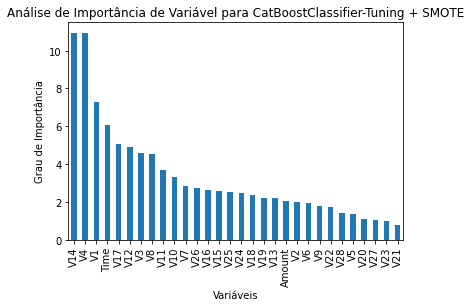

In [ ]:
import numpy as np

# Tirando média de matrix valores de imporância
media_importancia_var_smote = np.average(vet_importancia_var_smote, axis=0)
print(media_importancia_var_smote)

Mutic = pd.Series(media_importancia_var_smote)
Mutic.index = X.columns
Mutic = Mutic.sort_values(ascending=False)
# Mutic.plot.bar(figsize=(15,10))
Mutic.plot.bar()
plt.title("Análise de Importância de Variável para CatBoostClassifier-Tuning + SMOTE")
plt.xlabel("Variáveis")
plt.ylabel("Grau de Importância")

##Resultado consolidado

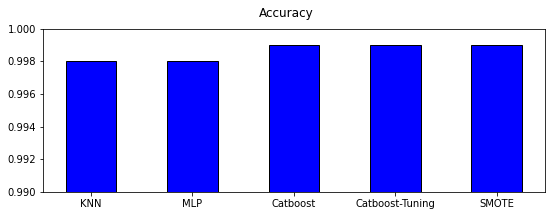

In [ ]:
names = ['KNN', 'MLP', 'Catboost','Catboost-Tuning','SMOTE']
values = [0.998, 0.998, 0.999, 0.999,0.999]
plt.figure(figsize=(9, 3))
plt.suptitle('Accuracy')
plt.bar(names, values,color = 'b',width = 0.5, edgecolor = 'black')

plt.ylim([0.99, 1])
plt.show()

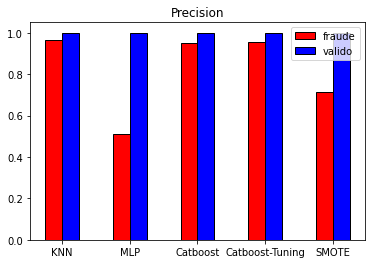

In [ ]:
fraude = [0.966, 0.512, 0.952, 0.956,0.712]
valido = [1, 1, 1, 1,1]
  
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, fraude, color = 'r',
        width = width, edgecolor = 'black',
        label='fraude')
plt.bar(r + width, valido, color = 'b',
        width = width, edgecolor = 'black',
        label='valido')
  
plt.title('Precision')
plt.xticks(r + width/2,['KNN', 'MLP', 'Catboost','Catboost-Tuning','SMOTE'])
plt.legend()
  
plt.show()

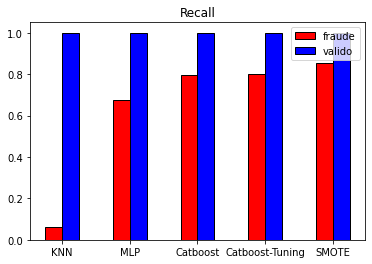

In [ ]:
fraude = [0.06, 0.674, 0.796, 0.802,0.852]
valido = [1, 1, 1, 1,1]
  
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, fraude, color = 'r',
        width = width, edgecolor = 'black',
        label='fraude')
plt.bar(r + width, valido, color = 'b',
        width = width, edgecolor = 'black',
        label='valido')
  
plt.title('Recall')
  
plt.xticks(r + width/2,['KNN', 'MLP', 'Catboost','Catboost-Tuning','SMOTE'])
plt.legend()
  
plt.show()

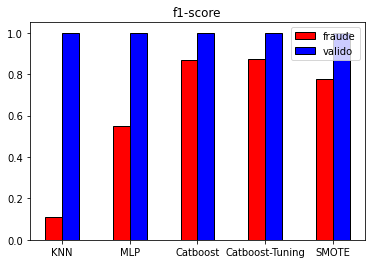

In [ ]:
fraude = [0.11, 0.548, 0.866, 0.872,0.776]
valido = [1, 1, 1, 1,1]
  
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, fraude, color = 'r',
        width = width, edgecolor = 'black',
        label='fraude')
plt.bar(r + width, valido, color = 'b',
        width = width, edgecolor = 'black',
        label='valido')
  
plt.title('f1-score')
  
plt.xticks(r + width/2,['KNN', 'MLP', 'Catboost','Catboost-Tuning','SMOTE'])
plt.legend()
  
plt.show()